# MonkeReader python model

In [ ]:
!pip install opencv-python

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2

Funzione per mostrare le immagini in jupyter

In [9]:
def show_img(img):
    plt.imshow(img)
    plt.title('my picture')
    plt.show()

Funzione che calcola le bbox delle parole

In [10]:
def calculate_bbox(fname: str):
    image_obj = cv2.imread(fname)
    rgb = cv2.imread(fname)
    small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

    #threshold the image
    _, bw = cv2.threshold(small, 0.0, 255.0, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # get horizontal mask of large size since text are horizontal components
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))
    connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

    # find all the contours
    contours, hierarchy,=cv2.findContours(connected.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    result = []
    for idx in range(len(contours)):
        x, y, w, h = cv2.boundingRect(contours[idx])
        cv2.rectangle(image_obj, (x, y), (x + w, y + h), (255, 0, 0), 1)
        result.append((x, y, w, h))
    
    show_img(image_obj)

    cv2.imwrite(f'bbox_{fname}', image_obj)

    return result

Test della funzione

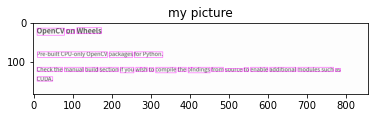

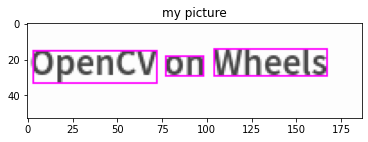

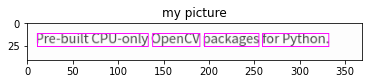

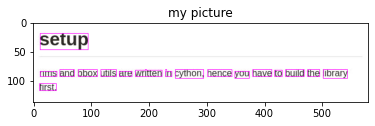

[(11, 105, 29, 12),
 (349, 84, 25, 12),
 (229, 84, 11, 9),
 (149, 84, 22, 9),
 (12, 84, 29, 9),
 (418, 82, 13, 11),
 (177, 82, 46, 11),
 (502, 81, 42, 15),
 (475, 81, 21, 12),
 (437, 81, 32, 12),
 (380, 81, 33, 12),
 (302, 81, 42, 12),
 (246, 81, 49, 15),
 (229, 81, 2, 1),
 (194, 81, 2, 1),
 (117, 81, 27, 12),
 (78, 81, 33, 12),
 (46, 81, 25, 12),
 (12, 19, 83, 28)]

In [12]:
calculate_bbox('test.png')
calculate_bbox('test2.png')
calculate_bbox('test3.png')
calculate_bbox('test4.jpeg')

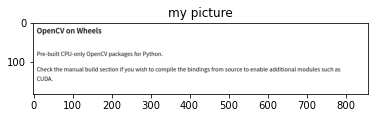

(array([[11, 19],
       [11, 20],
       [11, 21],
       [11, 22],
       [11, 23],
       [11, 24],
       [12, 24],
       [12, 25],
       [12, 23],
       [12, 22],
       [12, 21],
       [12, 20],
       [12, 19],
       [12, 18],
       [12, 17],
       [13, 17],
       [13, 26],
       [12, 26],
       [14, 16],
       [15, 16],
       [16, 16],
       [17, 16],
       [18, 16],
       [19, 17],
       [20, 17],
       [20, 18],
       [20, 19],
       [20, 20],
       [20, 21],
       [20, 22],
       [20, 23],
       [20, 24],
       [20, 25],
       [21, 24],
       [21, 23],
       [21, 22],
       [21, 21],
       [21, 20],
       [21, 19],
       [19, 26],
       [20, 26],
       [18, 27],
       [17, 27],
       [16, 27],
       [15, 27],
       [14, 27],
       [19, 27],
       [19, 16],
       [13, 16],
       [13, 27],
       [16, 28],
       [16, 15],
       [19, 25],
       [13, 25],
       [13, 18],
       [19, 18],
       [15, 28],
       [17, 28],
       [17, 1

In [13]:
img = cv2.imread('test.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = rgb_img
gray_img = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)


plt.imshow(gray_img, cmap='gray')
plt.title('my picture')
plt.show()

mser = cv2.MSER_create()
regions, bboxes = mser.detectRegions(gray_img)

print(regions, bboxes)
print(bboxes.shape)

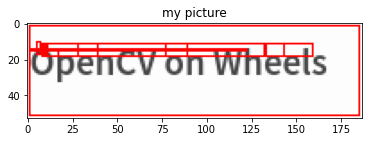

In [18]:
for bbox in bboxes:
    cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 1)

plt.imshow(img)
plt.title('my picture')
plt.show()

In [16]:
cv2.imwrite('test_mser.png', img)

True

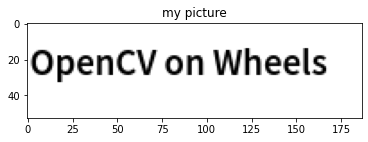

(array([[ 3, 19],
       [ 3, 20],
       [ 3, 21],
       [ 3, 22],
       [ 3, 23],
       [ 3, 24],
       [ 4, 24],
       [ 4, 25],
       [ 4, 23],
       [ 4, 22],
       [ 4, 21],
       [ 4, 20],
       [ 4, 19],
       [ 4, 18],
       [ 4, 17],
       [ 5, 17],
       [ 5, 26],
       [ 4, 26],
       [ 6, 16],
       [ 7, 16],
       [ 8, 16],
       [ 9, 16],
       [10, 16],
       [11, 17],
       [12, 17],
       [12, 18],
       [12, 19],
       [12, 20],
       [12, 21],
       [12, 22],
       [12, 23],
       [12, 24],
       [12, 25],
       [13, 24],
       [13, 23],
       [13, 22],
       [13, 21],
       [13, 20],
       [13, 19],
       [11, 26],
       [12, 26],
       [10, 27],
       [ 9, 27],
       [ 8, 27],
       [ 7, 27],
       [ 6, 27],
       [11, 27],
       [11, 16],
       [ 5, 16],
       [ 5, 27],
       [ 8, 28],
       [ 8, 15],
       [11, 25],
       [ 5, 25],
       [ 5, 18],
       [11, 18],
       [ 7, 28],
       [ 9, 28],
       [ 9, 1

In [21]:
img = cv2.imread('tes2.png')
#rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = rgb_img
gray_img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)


plt.imshow(gray_img, cmap='gray')
plt.title('my picture')
plt.show()

mser = cv2.MSER_create()
regions, bboxes = mser.detectRegions(gray_img)

print(regions, bboxes)
print(bboxes.shape)

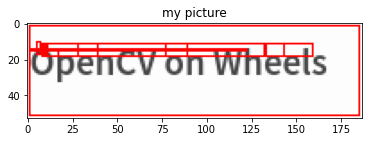

In [22]:
for bbox in bboxes:
    cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 1)

plt.imshow(img)
plt.title('my picture')
plt.show()

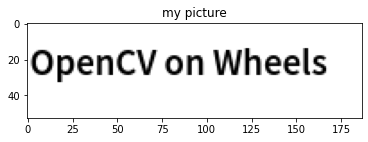

(array([[ 3, 19],
       [ 3, 20],
       [ 3, 21],
       [ 3, 22],
       [ 3, 23],
       [ 3, 24],
       [ 4, 24],
       [ 4, 25],
       [ 4, 23],
       [ 4, 22],
       [ 4, 21],
       [ 4, 20],
       [ 4, 19],
       [ 4, 18],
       [ 4, 17],
       [ 5, 17],
       [ 5, 26],
       [ 4, 26],
       [ 6, 16],
       [ 7, 16],
       [ 8, 16],
       [ 9, 16],
       [10, 16],
       [11, 17],
       [12, 17],
       [12, 18],
       [12, 19],
       [12, 20],
       [12, 21],
       [12, 22],
       [12, 23],
       [12, 24],
       [12, 25],
       [13, 24],
       [13, 23],
       [13, 22],
       [13, 21],
       [13, 20],
       [13, 19],
       [11, 26],
       [12, 26],
       [10, 27],
       [ 9, 27],
       [ 8, 27],
       [ 7, 27],
       [ 6, 27],
       [11, 27],
       [11, 16],
       [ 5, 16],
       [ 5, 27],
       [ 8, 28],
       [ 8, 15],
       [11, 25],
       [ 5, 25],
       [ 5, 18],
       [11, 18],
       [ 7, 28],
       [ 9, 28],
       [ 9, 1

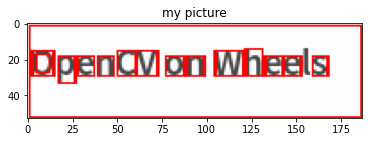

In [49]:
img = cv2.imread('tes2.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = rgb_img
gray_img = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)


plt.imshow(gray_img, cmap='gray')
plt.title('my picture')
plt.show()

mser = cv2.MSER_create()
regions, bboxes = mser.detectRegions(gray_img)

print(regions, bboxes)
print(bboxes.shape)

#for x, y, w, h in bboxes:
#    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)



for region in regions:
    [x, y, w, h] = cv2.boundingRect(region)
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)

plt.imshow(img)
plt.title('my picture')
plt.show()

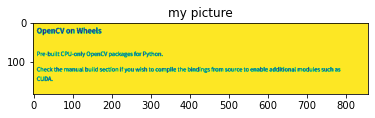

(array([[112,  16],
       [112,  15],
       [113,  15],
       [114,  15],
       [114,  16],
       [114,  17],
       [113,  17],
       [113,  18],
       [113,  19],
       [113,  20],
       [113,  21],
       [113,  22],
       [114,  22],
       [114,  23],
       [114,  24],
       [114,  25],
       [114,  26],
       [114,  27],
       [115,  27],
       [115,  28],
       [116,  28],
       [117,  28],
       [117,  27],
       [117,  26],
       [117,  25],
       [117,  24],
       [117,  23],
       [117,  22],
       [117,  21],
       [118,  21],
       [118,  20],
       [118,  19],
       [118,  18],
       [118,  17],
       [119,  17],
       [119,  16],
       [119,  15],
       [120,  15],
       [120,  16],
       [121,  16],
       [121,  17],
       [121,  18],
       [120,  18],
       [120,  19],
       [120,  20],
       [121,  20],
       [121,  21],
       [121,  22],
       [121,  23],
       [121,  24],
       [121,  25],
       [122,  25],
       [122

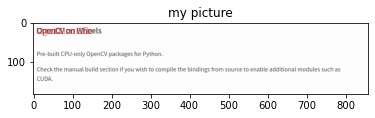

In [46]:

img = cv2.imread('test.png')
img_final = cv2.imread('test.png')
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY)


plt.imshow(new_img)
plt.title('my picture')
plt.show()


mser = cv2.MSER_create()
regions, bboxes = mser.detectRegions(new_img)

print(regions, bboxes)
print(bboxes.shape)

for x, y, w, h in bboxes:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)

plt.imshow(img)
plt.title('my picture')
plt.show()


(array([[[0, 0]],

       [[0, 1]],

       [[0, 2]],

       ...,

       [[3, 0]],

       [[2, 0]],

       [[1, 0]]], dtype=int32),) [[[-1 -1 -1 -1]]]
1


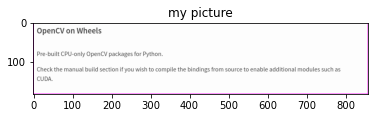

In [45]:
file_name = 'test.png'

img = cv2.imread(file_name)

img_final = cv2.imread(file_name)
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY)  # for black text , cv.THRESH_BINARY_INV
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))  # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more
dilated = cv2.dilate(new_img, kernel, iterations=9)  # dilate , more the iteration more the dilation

contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  # findContours returns 3 variables for getting contours

print(contours, hierarchy)
print(len(contours))
for contour in contours:
    # get rectangle bounding contour
    [x, y, w, h] = cv2.boundingRect(contour)

    # Don't plot small false positives that aren't text
    if w < 35 and h < 35:
        continue

    # draw rectangle around contour on original image
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)

    '''
    #you can crop image and send to OCR  , false detected will return no text :)
    cropped = img_final[y :y +  h , x : x + w]

    s = file_name + '/crop_' + str(index) + '.jpg' 
    cv2.imwrite(s , cropped)
    index = index + 1

    '''

plt.imshow(img)
plt.title('my picture')
plt.show()

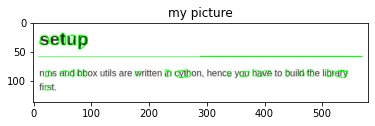

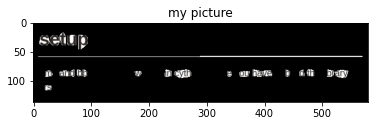

In [53]:
import numpy as np

mser = cv2.MSER_create()

img = cv2.imread('test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

vis = img.copy()


regions, _ = mser.detectRegions(gray)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]


cv2.polylines(vis, hulls, 1, (0, 255, 0))





plt.imshow(vis)
plt.title('my picture')
plt.show()


mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)
for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(text_only)
plt.title('my picture')
plt.show()

Questo codice sembra funzionare per bene !!